# Generic

In [1]:
import yfinance as yf
import pandas as pd
def collect_ratios(tickers: list, ratios: list):
    rows = []

    for ticker in tickers:
        info = yf.Ticker(ticker).info
        row = [ticker] + [info.get(ratio, None) for ratio in ratios]
        rows.append(row)
    return pd.DataFrame(rows, columns=["Ticker"] + ratios)

objects = ["AEVA", "LAZR", "INVZ", "OUST"]
for o in objects:
    ticker = yf.Ticker(o)
    print(f"ticker {o}: {ticker.info['marketCap']}")


ticker AEVA: 178352064
ticker LAZR: 175470448
ticker INVZ: 147659456
ticker OUST: 432298720


In [3]:
import os
from dotenv import load_dotenv

load_dotenv()
key = os.getenv("datasource.alphavantage.secret")

In [4]:
from alpha_vantage.fundamentaldata import FundamentalData
objects = ["AEVA", "LAZR", "INVZ", "OUST"]
fd = FundamentalData(key=key, output_format='pandas')
for o in objects:
    df_earnings = fd.get_earnings_annual(o)[0].set_index('fiscalDateEnding')
    print(f"ticker {o}: {df_earnings}")


ticker AEVA:                  reportedEPS
fiscalDateEnding            
2024-12-31             -1.83
2023-12-31             -0.65
2022-12-31             -0.68
2021-12-31             -0.51
2020-12-31           -0.0185
2019-12-31              0.05
ticker LAZR:                  reportedEPS
fiscalDateEnding            
2024-12-31             -0.53
2023-12-31             -0.86
2022-12-31             -0.78
2021-12-31             -0.56
2020-12-31           -2.2127
2019-12-31            0.1776
ticker INVZ:                  reportedEPS
fiscalDateEnding            
2024-12-31             -0.57
2023-12-31             -0.85
2022-12-31             -0.94
2021-12-31             -2.34
2020-12-31           -1.2487
2019-12-31           -2.4782
ticker OUST:                  reportedEPS
fiscalDateEnding            
2024-12-31             -1.62
2023-12-31             -7.68
2022-12-31             -0.74
2021-12-31             -0.83
2020-12-31           -8.2332


In [5]:
collect_ratios(objects, ["sector", "industry", "debtToEquity"])

,Ticker,sector,industry,debtToEquity
0,AEVA,Technology,Software - Infrastructure,3.629
1,LAZR,Consumer Cyclical,Auto Parts,NaN
2,INVZ,Consumer Cyclical,Auto Parts,37.494
3,OUST,Technology,Electronic Components,12.773


In [6]:
objects = ["AEVA", "LAZR", "INVZ", "OUST"]
for o in objects:
    stock = yf.Ticker(o)
    print(f"{o}: {stock.earnings_estimate}")


AEVA:             avg   low  high  yearAgoEps  numberOfAnalysts  growth
period                                                           
0q     -0.57667 -0.61 -0.54       -0.60                 3  0.0389
+1q    -0.59500 -0.61 -0.58       -0.56                 2 -0.0625
0y     -2.26000 -2.29 -2.22       -2.55                 3  0.1137
+1y    -2.15000 -2.36 -1.78       -2.26                 3  0.0487
LAZR:             avg       low     high  yearAgoEps  numberOfAnalysts  growth
period                                                                  
0q     -1.99971  -2.25000 -1.71885    -3.00000                 4  0.3334
+1q    -1.82250  -2.10000 -1.50000    -2.85000                 4  0.3605
0y     -9.94375 -10.19999 -9.61500   -13.04999                 4  0.2380
+1y    -6.53799  -7.60000 -5.85195    -9.94375                 4  0.3425
INVZ:             avg   low     high  yearAgoEps  numberOfAnalysts  growth
period                                                              
0q     -0.

In [8]:
from pytrends.request import TrendReq

pytrend = TrendReq(hl='en-US', tz=360)
keywords = ["Luminar Technologies", "Ouster Inc",  "AEVA Technologies", "Innoviz Technologies"]
pytrend.build_payload(keywords, cat=0, timeframe='today 12-m', geo='', gprop='')
interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df.head())
interest_over_time_df.to_csv('google_trends_data.csv')


TooManyRequestsError: The request failed: Google returned a response with code 429

In [9]:
def collect_sentiments(ticker):
    import requests
    r = requests.get(f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={ticker}&apikey={key}')
    return pd.DataFrame.from_dict(r.json()['feed'])


def summarize_sentiments(df, ticker):
    from collections import Counter

    ticker_sentiment = df['ticker_sentiment']
    label_string = ""
    score = 0
    for record in ticker_sentiment:
        if record[0]['ticker'] == ticker:
            if label_string != "":
                label_string += ","
            label_string += record[0]['ticker_sentiment_label']
            score += float(record[0]['ticker_sentiment_score'])

    print(score)
    word_count = Counter(label_string.split(","))
    word_count_df = pd.DataFrame(word_count.items(), columns=['Word', 'Count'])
    print(word_count_df)


In [11]:
collect_sentiments("AEVA")

,title,url,time_published,authors,summary,banner_image,source,category_within_source,source_domain,topics,overall_sentiment_score,overall_sentiment_label,ticker_sentiment
0,Lear ( LEA ) Tops Q4 Earnings and Revenue Es...,https://www.zacks.com/stock/news/2410787/lear-...,20250206T124009,[Zacks Equity Research],Lear (LEA) delivered earnings and revenue surp...,https://staticx-tuner.zacks.com/images/default...,Zacks Commentary,n/a,www.zacks.com,"[{'topic': 'Earnings', 'relevance_score': '0.9...",0.148860,Neutral,"[{'ticker': 'AEVA', 'relevance_score': '0.2081..."
1,Aeva Technologies Gears Up For Scaling of Indu...,https://www.benzinga.com/partner/emerging-mark...,20241217T131533,[Meg Flippin],"Aeva Technologies Inc. AEVA, the LiDAR sensor ...",https://cdn.benzinga.com/files/images/story/20...,Benzinga,Markets,www.benzinga.com,"[{'topic': 'Real Estate & Construction', 'rele...",0.231287,Somewhat-Bullish,"[{'ticker': 'DTGHF', 'relevance_score': '0.045..."
2,"Aeva Technologies, Inc. ( AEVA ) Reports Q3 ...",https://www.zacks.com/stock/news/2365579/aeva-...,20241106T223510,[Zacks Equity Research],Aeva Technologies (AEVA) delivered earnings an...,https://staticx-tuner.zacks.com/images/default...,Zacks Commentary,n/a,www.zacks.com,"[{'topic': 'Earnings', 'relevance_score': '0.9...",0.135081,Neutral,"[{'ticker': 'AEVA', 'relevance_score': '0.3992..."
3,Aeva Enables Customers To Go Where They Have N...,https://www.benzinga.com/partner/emerging-mark...,20241009T115814,[Meg Flippin],From self-driving trucks that can safely achie...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,Markets,www.benzinga.com,"[{'topic': 'Real Estate & Construction', 'rele...",0.217952,Somewhat-Bullish,"[{'ticker': 'DTGHF', 'relevance_score': '0.037..."
4,"Why Nvidia, Daimler Truck, Nikon And Top U.S. ...",https://www.benzinga.com/partner/emerging-mark...,20240917T134744,[Meg Flippin],A boom in automated passenger cars and trucks ...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,Markets,www.benzinga.com,"[{'topic': 'Real Estate & Construction', 'rele...",0.239580,Somewhat-Bullish,"[{'ticker': 'DTGHF', 'relevance_score': '0.063..."
5,The Technology Powering Aeva's ( NYSE: AEVA )...,https://www.benzinga.com/partner/emerging-mark...,20240904T130039,[Meg Flippin],"When it comes to autonomous driving, safety an...",https://cdn.benzinga.com/files/images/story/20...,Benzinga,Markets,www.benzinga.com,"[{'topic': 'Real Estate & Construction', 'rele...",0.267370,Somewhat-Bullish,"[{'ticker': 'DTGHF', 'relevance_score': '0.041..."
6,"Deals With Automotive Companies, Top National ...",https://www.benzinga.com/partner/emerging-mark...,20240812T131547,[Meg Flippin],"From trains to trucks, self-driving vehicles a...",https://cdn.benzinga.com/files/images/story/20...,Benzinga,Markets,www.benzinga.com,"[{'topic': 'Earnings', 'relevance_score': '0.1...",0.362507,Bullish,"[{'ticker': 'DTGHF', 'relevance_score': '0.046..."
7,"Aeva Technologies, Inc. ( AEVA ) Reports Q2 ...",https://www.zacks.com/stock/news/2318547/aeva-...,20240807T224004,[Zacks Equity Research],Aeva Technologies (AEVA) delivered earnings an...,https://staticx-tuner.zacks.com/images/default...,Zacks Commentary,n/a,www.zacks.com,"[{'topic': 'Earnings', 'relevance_score': '0.9...",0.119328,Neutral,"[{'ticker': 'AEVA', 'relevance_score': '0.3960..."
8,This Lidar Stock Is Surging While Tesla Looks ...,https://www.investors.com/news/lidar-stock-tes...,20240517T132700,"[Investor's Business Daily, KIT NORTON]",Autonomous vehicle technology stock Ouster ( O...,https://www.investors.com/wp-content/uploads/2...,Investors Business Daily,n/a,www.investors.com,"[{'topic': 'IPO', 'relevance_score': '0.158519...",0.200496,Somewhat-Bullish,"[{'ticker': 'AEVA', 'relevance_score': '0.1559..."
9,"After Plunging -27.9% in 4 Weeks, Here's Why t...",https://www.zacks.com/stock/news/2246592/after...,20240327T133506,[Zacks Equity Research],The heavy selling pressure might have exhauste...,https://staticx-tuner.zack

In [ ]:
# LAZR

In [8]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def plot(ticker, start, end):
    data = yf.Ticker(ticker).history(start=start, end=end)
    df = pd.DataFrame(data).dropna()

    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df["Close"], label="Closing Price", linewidth=2)
    plt.title(ticker)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

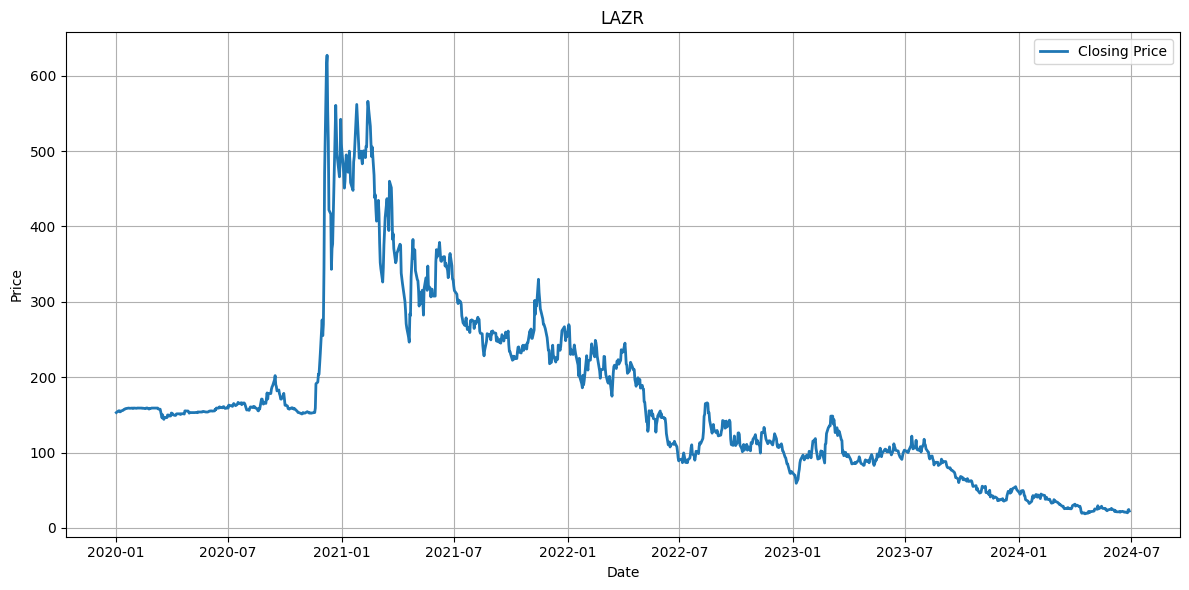

In [6]:
plot("LAZR", "2020-01-01", "2024-06-30")

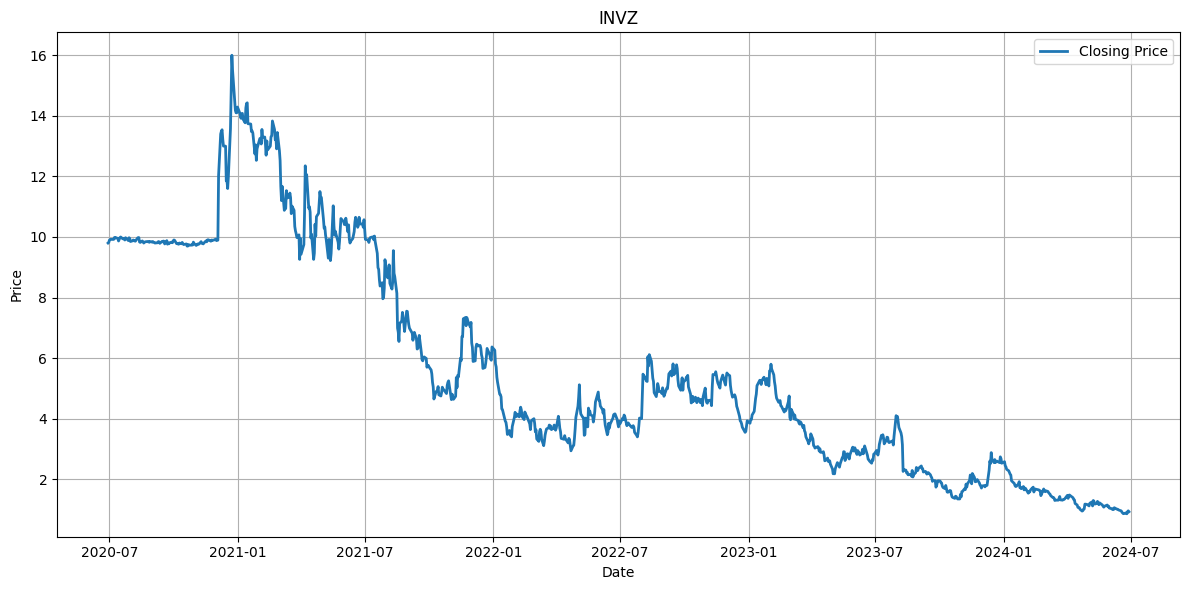

In [9]:
plot("INVZ", "2020-01-01", "2024-06-30")

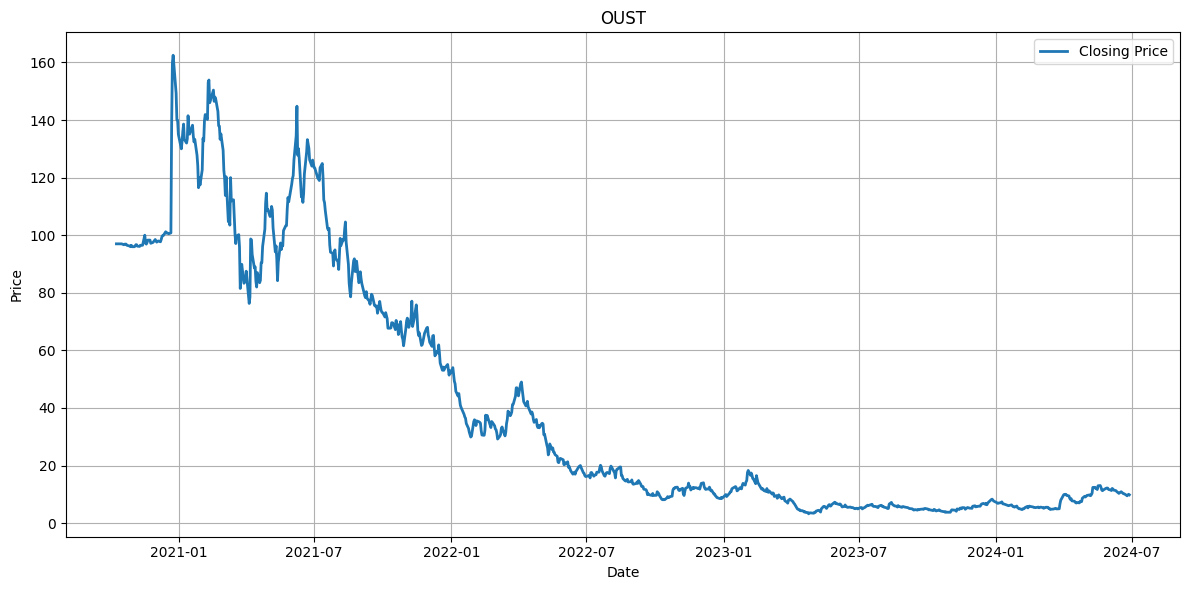

In [10]:
plot("OUST", "2020-01-01", "2024-06-30")

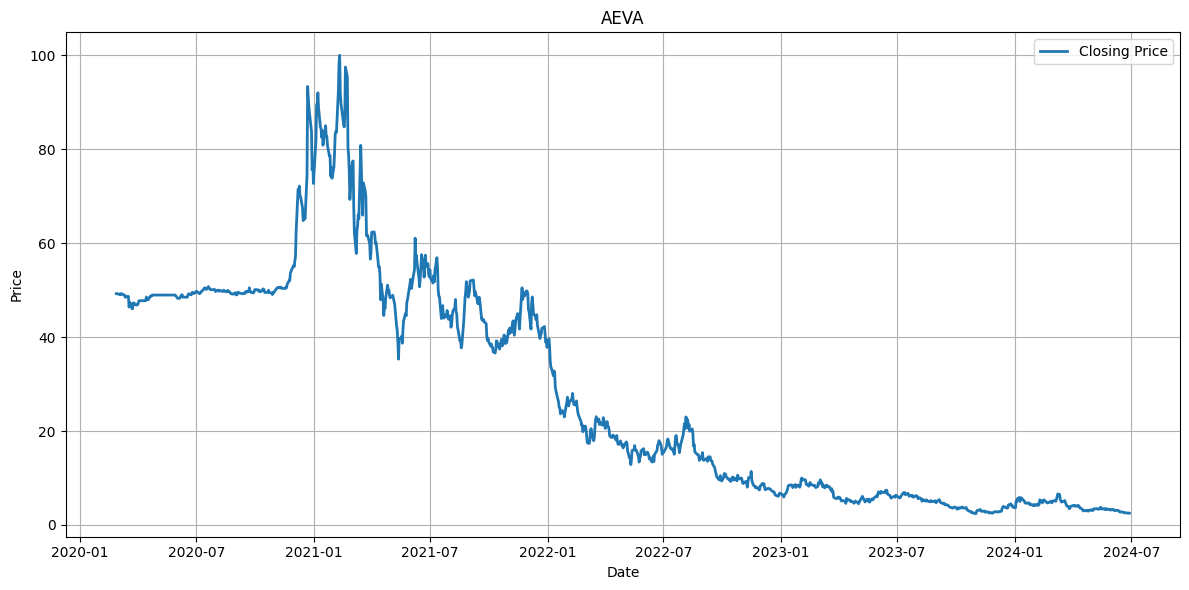

In [11]:
plot("AEVA", "2020-01-01", "2024-06-30")